# BDA STUDY REPLICATION 

by DONATO SCARANO

In this assignment, I am replicating the study conducted by Muller at al 16: https://canvas.ltu.se/courses/21054/files/3591424?wrap=1 to predict the helpfulness of online customer reviews. 

I am using as in the study the reviews for the video games category.

## RESEARCH QUESTION

What we want to address is the question of ‘What makes a helpful online review?’ (Mudambi & Schuff, 2010).
We are building a predictive model for review helpfulnews that can be valuable in many practical and theoretical contexts from proper sorting to filtering to understanding how to write effective reviews and discovering hidden relationships between features.


## DATA COLLECTION

We pre-process and transform the data to restrict our focus on valuable information and remove duplicates and reduce our dataset.

In [6]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import json

#import json review data
reviews_data = []
with gzip.open('reviews_Video_Games.json.gz', 'rt', encoding='utf-8') as file:
    for line in file:
        review = json.loads(line)
        reviews_data.append(review)

#count the number of reviews in the file
num_reviews = len(reviews_data)
print('Number of Reviews:',num_reviews)

reviews_data[:5]


Number of Reviews: 1324753


[{'reviewerID': 'AB9S9279OZ3QO',
  'asin': '0078764343',
  'reviewerName': 'Alan',
  'helpful': [1, 1],
  'reviewText': "I haven't gotten around to playing the campaign but the multiplayer is solid and pretty fun. Includes Zero Dark Thirty pack, an Online Pass, and the all powerful Battlefield 4 Beta access.",
  'overall': 5.0,
  'summary': 'Good game and Beta access!!',
  'unixReviewTime': 1373155200,
  'reviewTime': '07 7, 2013'},
 {'reviewerID': 'A24SSUT5CSW8BH',
  'asin': '0078764343',
  'reviewerName': 'Kindle Customer',
  'helpful': [0, 0],
  'reviewText': 'I want to start off by saying I have never played the Call of Duty games. This is only the second first person shooter game that I have own. I think it is a lot of fun. Has good graphics and nice story line. It does take some skill to get through the levels. I think all players can enjoy this game. There are three levels to choose from based on your skill level. If your looking for first person shooter game that has current mi

In [8]:
# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(reviews_data)

# Check for duplicate reviews based on a subset of columns
duplicate_reviews = df[df.duplicated(subset=['reviewerID', 'reviewText'])]

# Count the number of unique reviews
num_unique_reviews = df.drop_duplicates(subset=['reviewerID', 'reviewText']).shape[0]

num_unique_reviews

1324753

In [10]:
# Display the DataFrame
display(df.head())



,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AB9S9279OZ3QO,0078764343,Alan,"[1, 1]",I haven't gotten around to playing the campaig...,5.0,Good game and Beta access!!,1373155200,"07 7, 2013"
1,A24SSUT5CSW8BH,0078764343,Kindle Customer,"[0, 0]",I want to start off by saying I have never pla...,5.0,Love the game,1377302400,"08 24, 2013"
2,AK3V0HEBJMQ7J,0078764343,"Miss Kris ""Krissy""","[0, 0]",this will be my second medal of honor I love h...,4.0,MOH nice,1372896000,"07 4, 2013"
3,A10BECPH7W8HM7,043933702X,"GMC ""Old Time Modeler""","[0, 0]","great game when it first came out, and still a...",5.0,Five Stars,1404950400,"07 10, 2014"
4,A2PRV9OULX1TWP,043933702X,grimi,"[0, 0]",this is the first need for speed I bought year...,5.0,memory lane,1386115200,"12 4, 2013"


In [12]:
review_counts = df['asin'].value_counts().reset_index()
review_counts.columns = ['Game ID', 'Review Count']
display(review_counts)


,Game ID,Review Count
0,B00DJFIMW6,16221
1,B00BGA9WK2,7561
2,B00FAX6XQC,5713
3,B009KS4XRO,5489
4,B002VBWIP6,5190
...,...,...
50205,B005CT3MZO,1
50206,B005CTCT76,1
50207,B005CTXMH2,1
50208,B005CU87LW,1


In [14]:
display("Average Rating", df['overall'].mean())  # Average rating

'Average Rating'

3.9787537752320623

In [16]:
#overview of helpfulness rating

# Count the frequency of each helpfulness ratio value
helpfulness_counts = df['helpful'].value_counts().reset_index()
helpfulness_counts.columns = ['Helpfulness Ratio', 'Frequency']
display(helpfulness_counts)

,Helpfulness Ratio,Frequency
0,"[0, 0]",626596
1,"[1, 1]",121624
2,"[0, 1]",83396
3,"[1, 2]",48551
4,"[2, 2]",43158
...,...,...
7934,"[781, 823]",1
7935,"[97, 141]",1
7936,"[280, 361]",1
7937,"[117, 143]",1


Over half of the reviews do not have any helpfulness rating (neither positive nor negative)
We are going to exclude reviews with less than two helpfulness ratings to increase the reliability of the analysis

In [19]:
# Filter out reviews with less than two helpfulness ratings

def filter_helpful(row):
    return row[0] >= 2 and row[1] >= 2

# Apply the function to the 'helpful' column
df2 = df[df['helpful'].apply(filter_helpful)]

# Display the filtered DataFrame
display(df2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
9,A182S3ANC0W7DL,0439342260,James,"[2, 2]",I am an Ice Cream Truck Vendor (I lease out 20...,4.0,Teach Business to Kids & Adults,1355875200,"12 19, 2012"
12,APDCEJMFDO2YT,0439394422,"L. Murray ""common sense""","[2, 3]","Such fast shipping, games is such great condit...",5.0,AMAZING COMPANY,1285545600,"09 27, 2010"
13,AFJ7A9CSEPZNY,043940133X,B. Vega,"[22, 24]","My son hates math! But, he loves Star Wars an...",4.0,Math fun for the mathmatically challenged,1168300800,"01 9, 2007"
15,A2H3TQWU51W1WE,043940133X,ethans mom,"[3, 3]",My son who hates doing math loves to play this...,5.0,Great math game for your little Star Wars fan,1299456000,"03 7, 2011"
16,A3KO10N2ODLHBR,043940133X,Golden Gopher Mom,"[8, 8]",My seven year old has had a lot of fun with th...,5.0,Great game!,1258329600,"11 16, 2009"
...,...,...,...,...,...,...,...,...,...
1324722,A3RK6IJ1BLFJKX,B00L3KU0S8,Pete p.,"[2, 2]",It's good dust cover,5.0,Five Stars,1405382400,"07 15, 2014"
1324723,AGV7DRPGUQRRJ,B00L3KU0S8,Wayne B.,"[3, 3]",Let me say that i bought covers in the past an...,5.0,Awesome cover!!,1404864000,"07 9, 2014"
1324724,A3LEQOLIXQU7KS,B00L45HS50,nuttytoad,"[2, 2]",I really liked this game. The graphics were e...,4.0,Great game!,1404518400,"07 5, 2014"
1324741,A2FDUH8LZBYS7G,B00LBAM588,Sary,"[2, 2]",badass game,5.0,"this is my first time playing this game, amazi...",1404691200,"07 7, 2014"


In [87]:
# Define a function to calculate the helpfulness ratio
def calculate_helpfulness(row):
    helpful_votes, total_votes = row['helpful']
    if total_votes > 0:
        return helpful_votes / total_votes
    else:
        return 0
    
# Create a copy of the DataFrame
df2 = df2.copy()

# Now you can safely perform the assignment without warnings
df2.loc[:,'Helpfulness_ratio'] = df2.apply(calculate_helpfulness, axis=1)

# Display the DataFrame
display(df2.head())

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Helpfulness_ratio,Helpfulness_dichotomized,processed_text,topic_vector
9,A182S3ANC0W7DL,0439342260,James,"[2, 2]",I am an Ice Cream Truck Vendor (I lease out 20...,4.0,Teach Business to Kids & Adults,1355875200,"12 19, 2012",1.000000,helpful,"[ice, cream, truck, vendor, lease, 20+, trucks...","[(1, 0.17666943), (3, 0.34843966), (4, 0.42206..."
12,APDCEJMFDO2YT,0439394422,"L. Murray ""common sense""","[2, 3]","Such fast shipping, games is such great condit...",5.0,AMAZING COMPANY,1285545600,"09 27, 2010",0.666667,helpful,"[fast, shipping, games, great, condition, even...","[(0, 0.4769955), (1, 0.5013463)]"
13,AFJ7A9CSEPZNY,043940133X,B. Vega,"[22, 24]","My son hates math! But, he loves Star Wars an...",4.0,Math fun for the mathmatically challenged,1168300800,"01 9, 2007",0.916667,helpful,"[son, hates, math, loves, star, wars, jabba, m...","[(1, 0.4695875), (3, 0.28728595), (5, 0.127228..."
15,A2H3TQWU51W1WE,043940133X,ethans mom,"[3, 3]",My son who hates doing math loves to play this...,5.0,Great math game for your little Star Wars fan,1299456000,"03 7, 2011",1.000000,helpful,"[son, hates, math, loves, play, game, like, fa...","[(1, 0.34097922), (3, 0.16749965), (4, 0.19994..."
16,A3KO10N2ODLHBR,043940133X,Golden Gopher Mom,"[8, 8]",My seven year old has had a lot of fun with th...,5.0,Great game!,1258329600,"11 16, 2009",1.000000,helpful,"[seven, year, old, lot, fun, game, learning, m...","[(0, 0.15206017), (1, 0.68123645), (4, 0.13124..."


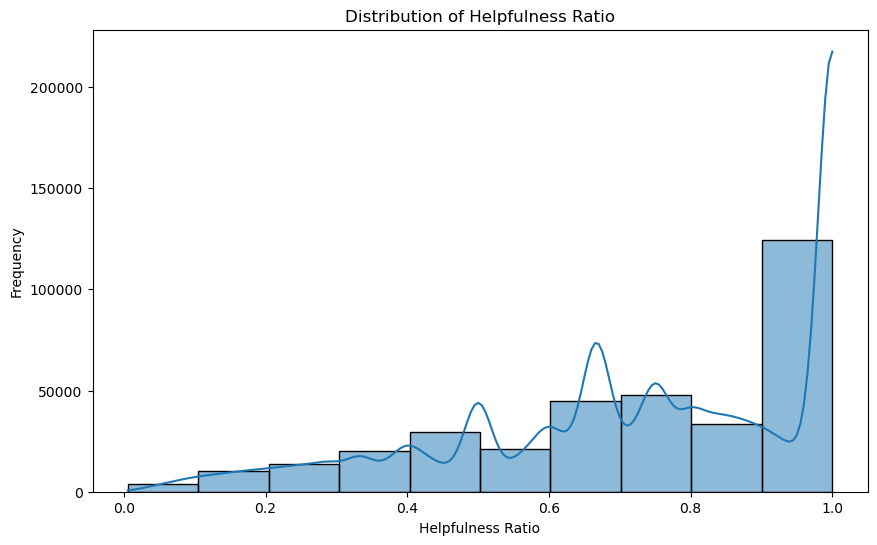

In [31]:
# Plot the distribution of the 'Helpfulness_ratio'
plt.figure(figsize=(10, 6))
sns.histplot(df2['Helpfulness_ratio'], bins=10, kde=True)
plt.title('Distribution of Helpfulness Ratio')
plt.xlabel('Helpfulness Ratio')
plt.ylabel('Frequency')
plt.show()

In order to avoid statistical concerns arising from the
extreme distribution of values, we dichotomised the
review helpfulness variable (i.e., reviews with a helpfulness
ratio of > 0.5 were recoded as helpful, and reviews ⩽0.5 as
not helpful).

In [36]:
# Define a function to dichotomize the helpfulness ratio
def dichotomize_helpfulness(df2):
    if df2['Helpfulness_ratio'] > 0.5:
        return 'helpful'
    else:
        return 'not helpful'

# Apply the function to each review
df2['Helpfulness_dichotomized'] = df2.apply(dichotomize_helpfulness, axis=1)

# Display the DataFrame
display(df2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Helpfulness_ratio,Helpfulness_dichotomized
9,A182S3ANC0W7DL,0439342260,James,"[2, 2]",I am an Ice Cream Truck Vendor (I lease out 20...,4.0,Teach Business to Kids & Adults,1355875200,"12 19, 2012",1.000000,helpful
12,APDCEJMFDO2YT,0439394422,"L. Murray ""common sense""","[2, 3]","Such fast shipping, games is such great condit...",5.0,AMAZING COMPANY,1285545600,"09 27, 2010",0.666667,helpful
13,AFJ7A9CSEPZNY,043940133X,B. Vega,"[22, 24]","My son hates math! But, he loves Star Wars an...",4.0,Math fun for the mathmatically challenged,1168300800,"01 9, 2007",0.916667,helpful
15,A2H3TQWU51W1WE,043940133X,ethans mom,"[3, 3]",My son who hates doing math loves to play this...,5.0,Great math game for your little Star Wars fan,1299456000,"03 7, 2011",1.000000,helpful
16,A3KO10N2ODLHBR,043940133X,Golden Gopher Mom,"[8, 8]",My seven year old has had a lot of fun with th...,5.0,Great game!,1258329600,"11 16, 2009",1.000000,helpful
...,...,...,...,...,...,...,...,...,...,...,...
1324722,A3RK6IJ1BLFJKX,B00L3KU0S8,Pete p.,"[2, 2]",It's good dust cover,5.0,Five Stars,1405382400,"07 15, 2014",1.000000,helpful
1324723,AGV7DRPGUQRRJ,B00L3KU0S8,Wayne B.,"[3, 3]",Let me say that i bought covers in the past an...,5.0,Awesome cover!!,1404864000,"07 9, 2014",1.000000,helpful
1324724,A3LEQOLIXQU7KS,B00L45HS50,nuttytoad,"[2, 2]",I really liked this game. The graphics were e...,4.0,Great game!,1404518400,"07 5, 2014",1.000000,helpful
1324741,A2FDUH8LZBYS7G,B00LBAM588,Sary,"[2, 2]",badass game,5.0,"this is my first time playing this game, amazi...",1404691200,"07 7, 2014",1.000000,helpful


## DATA ANALYSIS

Early researches focused mostly on the overall rating or the star rating although recently many studies have started to analyze the text of the reviews(e.g.,Mudambi & Schuff, 2010;Cao et al, 2011; Ghose & Ipeirotis, 2011; Pan & Zhang, 2011; Korfiatisa et al, 2012).
To capture the review content and its impact on the helpfulness of the review we use probabilistic topic modelling using LDA (Latent Dirichlet Allocation) algorithm.

Probabilistic topic models are unsupervised algorithms that annotate the documents with topic labels.

The foundational idea is the distributional hypothesis of statistical semantics; words that occur togheter in similar contexts tend to have similar meanings (Turney & Pantel, 2010).


In [40]:
import nltk
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('stopwords')
nltk.download('punkt')

# Preprocess the text
stop_words = set(stopwords.words('english'))
df2['processed_text'] = df2['reviewText'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word not in stop_words and word not in string.punctuation])

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df2['processed_text'])

# Convert the collection of texts to a bag of words
corpus = [dictionary.doc2bow(text) for text in df2['processed_text']]

# Train the LDA model and reduce the num_topics to 10 from 100 in the study to avoid issues with computing resources as my machine is not powerful enough and tend to crash
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10)

# Annotate each review with a vector of topic probabilities
df2['topic_vector'] = df2['processed_text'].apply(lambda x: lda_model.get_document_topics(dictionary.doc2bow(x)))




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\donsc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\donsc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [360]:
# Display the DataFrame
display(df2['topic_vector'].head())

0    [(1, 0.17666943), (3, 0.34843966), (4, 0.42206...
1                     [(0, 0.4769955), (1, 0.5013463)]
2    [(1, 0.4695875), (3, 0.28728595), (5, 0.127228...
3    [(1, 0.34097922), (3, 0.16749965), (4, 0.19994...
4    [(0, 0.15206017), (1, 0.68123645), (4, 0.13124...
Name: topic_vector, dtype: object

In [378]:
import pandas as pd

# Create a new DataFrame to store the separated values
separated_df = pd.DataFrame(df2['topic_vector'].tolist())

# Remove the first pair values (1, 0, 5, etc.) and keep only the second values
separated_df = separated_df.apply(lambda row: row.apply(lambda x: x[1] if x is not None else None))

# Add a column to store the length of each list
separated_df['length'] = separated_df.apply(lambda row: len(row), axis=1)

# Rename the columns to match the desired format
separated_df.columns = [str(i) for i in range(len(separated_df.columns))]

# Remove NaN values by replacing them with an empty string
separated_df = separated_df.fillna('0')

print(separated_df)

               0         1         2         3         4         5         6  \
0       0.176669   0.34844  0.422061  0.041456         0         0         0   
1       0.476995  0.501346         0         0         0         0         0   
2       0.469588  0.287286  0.127228  0.090886         0         0         0   
3       0.340979    0.1675  0.199947  0.266546         0         0         0   
4       0.152060  0.681236  0.131242         0         0         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
348989  0.819929   0.02001  0.020004  0.020008  0.020005  0.020011  0.020005   
348990  0.710530  0.227915         0         0         0         0         0   
348991  0.245390  0.710145         0         0         0         0         0   
348992  0.033347  0.033365  0.033347   0.03335  0.033354  0.033355  0.033347   
348993  0.038489  0.073482  0.121959   0.46353  0.068847  0.229033         0   

               7         8         9  1

To train the predictive model we use random forests.

Random forests is an ensemble supervised-learning technique that is able to process high-dimensional data sets and is robust against data anomalies.

A random forest model is constructed by generating a multitude of decision trees based on bootstrapped
sub-samples such that only a random sample of the available variables at each split of the tree is considered a potential split candidate (Breiman, 2001a). 

We use the implementation provided by the scikit-learn Python package and set the number of trees to 128.

In [433]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence
from mpl_toolkits.mplot3d import Axes3D


df2.loc[df2['Helpfulness_ratio'] > 0.5, 'Helpfulness_ratio'] = 1
df2.loc[df2['Helpfulness_ratio'] <= 0.5, 'Helpfulness_ratio'] = 0


X = pd.concat([df2['overall'],df2['unixReviewTime'],separated_df],axis=1)


# Extract the input features (X) and the target variable (y)

y = df2['Helpfulness_ratio'].apply(lambda x: 1 if x > 0.5 else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the RandomForestRegressor
forest = RandomForestClassifier(n_estimators=128, n_jobs=8, random_state=42)
forest = forest.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = forest.predict(X_test)

#RF Model Accuracy
print("Forest Score:", forest.score(X_test,y_test))



Forest Score: 0.7731915930027651


Reciever Operating Characteristic (ROC) Curve show the predictive performance of our classification on the holdout test set (20% of the overall dataset).

It plots the true positive rate against the false positive rate. 

The are under the ROC Curve amounts to 0.644460256983775 which means that the model has an accuracy of 64% in distinguishing between a randomly drawn helpful review and a non-helpful one.


In [436]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# RF model ROC AUC
preds = forest.predict(X_test)
probs = forest.predict_proba(X_test)

prob_1 = np.ndarray(len(probs))
count = 0
for i in probs:
    prob_1[count] = i[1]
    count = count + 1
    
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_1, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
print("ROC AUC: ", roc_auc)


ROC AUC:  0.6816272869001151


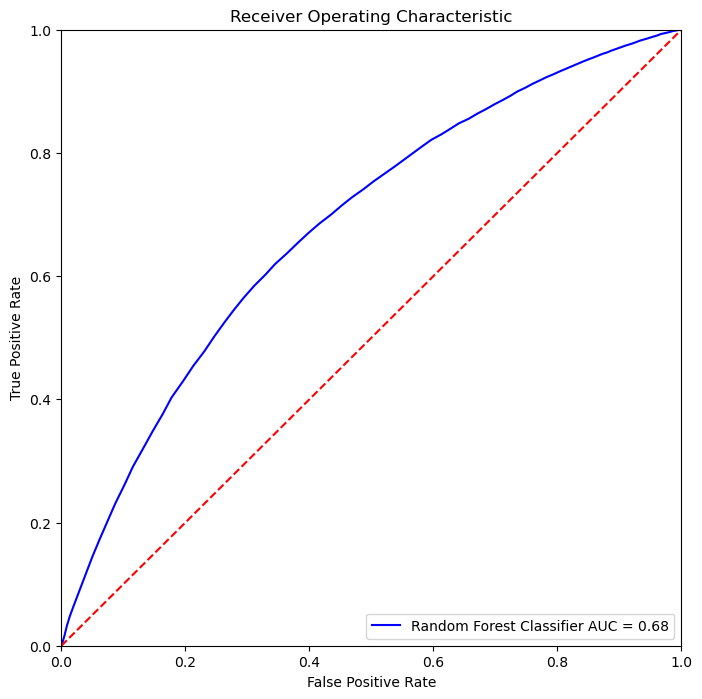

In [438]:
# plot ROC curve
plt.figure(figsize=(8, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='Random Forest Classifier AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('fig1.pdf', dpi=600)
plt.show()

The only way to interpret a random forest model are the variable importance measures.

We ehow the most influential variables for predicting the helpfulness of a review.

The most important variables are ranked below.



In [441]:
# extract feature importances
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)

print ("Feature ranking:")
for f in range(len(indices)):
    print ("%d. Feature %d (%s): %f" % (f + 1, indices[f], list(X.columns.values)[indices[f]], importances[indices[f]]))

Feature ranking:
1. Feature 1 (unixReviewTime): 0.219470
2. Feature 2 (0): 0.201327
3. Feature 3 (1): 0.187303
4. Feature 4 (2): 0.142838
5. Feature 5 (3): 0.092845
6. Feature 0 (overall): 0.058151
7. Feature 6 (4): 0.052152
8. Feature 7 (5): 0.024311
9. Feature 8 (6): 0.009646
10. Feature 9 (7): 0.004126
11. Feature 11 (9): 0.004082
12. Feature 10 (8): 0.003748
13. Feature 12 (10): 0.000000


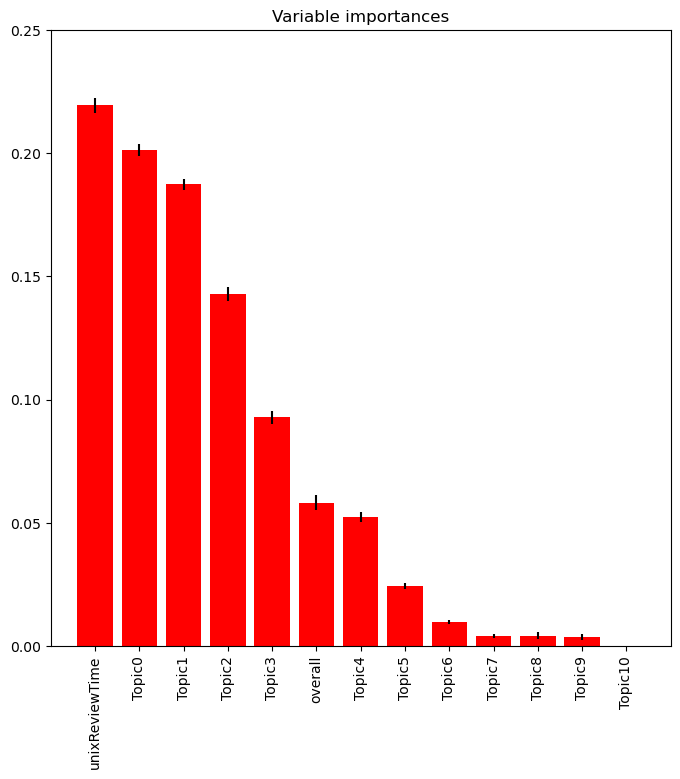

In [449]:
# Plot the feature importances of the forest
labels = ['unixReviewTime','Topic0', 'Topic1','Topic2','Topic3','overall','Topic4','Topic5','Topic6','Topic7','Topic8','Topic9','Topic10',]
plt.figure(figsize=(8, 8))
plt.title("Variable importances")
plt.bar(range(len(labels)), importances[indices][0:len(labels)], color="r", yerr=std[indices][0:len(labels)], align="center")
plt.xlim((-1,len(labels)))
plt.xticks(range(len(labels)), labels, rotation=90)
plt.ylim((0,0.25))
plt.savefig('fig2.pdf', dpi=600)
plt.show()

We have to empirically triangulated the LDA results, that is, the pertopic word distributions and the per-document topic distributions. In a first step, we employed a word intrusion task to measure the semantic coherence of topics. Since topics are represented by words that co-occur with high probability, the idea behind the word intrusion task is to insert a randomly chosen word (intruder) into a set of words representative of a topic and ask human judges to identify the intruder. 
For each topic, we generated five randomly ordered sets of six words: the five most probable words for the given topic plus one randomly chosen word with low probability for the respective topic.

In [452]:
import random

# Function to generate word sets for word intrusion task
def generate_word_sets(lda_model, num_sets=5, num_words=5):
    word_sets = []
    num_topics = lda_model.num_topics

    for topic_id in range(num_topics):
        top_words = [word for word, _ in lda_model.show_topic(topic_id, topn=num_words)]
        for _ in range(num_sets):
            intruder = random.choice(list(lda_model.id2word.values()))  # Choose a random word as intruder
            while intruder in top_words:  # Ensure intruder is not in the top words
                intruder = random.choice(lda_model.id2word.values())
            word_set = top_words + [intruder]
            random.shuffle(word_set)  # Randomly order the word set
            word_sets.append(word_set)

    return word_sets

# Generate word sets for the word intrusion task
word_sets = generate_word_sets(lda_model, num_sets=5, num_words=5)

# Display the generated word sets
for i, word_set in enumerate(word_sets):
    print(f"Word Set {i+1}: {word_set}")

Word Set 1: ["'ask", 'one', 'xbox', "n't", "'s", 'ps4']
Word Set 2: ['one', "n't", 'xbox', 'ps4', "'s", 'moombas']
Word Set 3: ["n't", 'xbox', 'right.c', 'ps4', 'one', "'s"]
Word Set 4: ['xbox', "'s", 'one', 'capacity.graphically', 'ps4', "n't"]
Word Set 5: ['one', "'s", 'xbox', "n't", 'immuersion', 'ps4']
Word Set 6: ['game', "n't", 'play', 'get', 'like', 'valgas.my']
Word Set 7: ['turd.but', 'game', "n't", 'play', 'get', 'like']
Word Set 8: ['get', 'game', 'play', 'like', "n't", 'stealth.']
Word Set 9: ['came.so', 'get', 'play', "n't", 'like', 'game']
Word Set 10: ['keuth', 'like', 'play', 'get', 'game', "n't"]
Word Set 11: ['34', 'pokemon', 'unit.now', '8220', '8221', 'simcity']
Word Set 12: ['8220', 'pokemon', '34', '8221', 'ventrillo.needs', 'simcity']
Word Set 13: ['34', 'simcity', 'bobbled', '8220', 'pokemon', '8221']
Word Set 14: ['8221', 'pokemon', 'simcity', 'however.before', '34', '8220']
Word Set 15: ['8220', '8221', 'simcity', '34', 'pokemon', 'orange.please']
Word Set 16:

We will present these sets to three independent human coders via the crowdsourcing platform Amazon
Mechanical Turk and prompt them to identify the intruder. 

In a second step, we conduct a best topic task to validate the topic assignments for each review. (The task is a variation of the topic intrusion task developed by Chang et al (2009). Instead of identifying an intruder among a set of highly probable topics, we chose to identify the best match of a topic.

In [461]:
import random

# Function to generate topic sets for the best topic task
def generate_topic_sets(lda_model, df, num_sets=5):
    topic_sets = []
    num_topics = lda_model.num_topics

    for index, row in df.iterrows():
        review_topics = lda_model.get_document_topics(dictionary.doc2bow(row['processed_text']))
        top_topics = sorted(review_topics, key=lambda x: x[1], reverse=True)[:num_sets]
        topic_set = [topic for topic, _ in top_topics]  # Extract topics without indexing
        random.shuffle(topic_set)  # Randomly order the topic set
        topic_sets.append(topic_set)

    return topic_sets

# Generate topic sets for the best topic task
topic_sets = generate_topic_sets(lda_model, df2, num_sets=5)


# Display a summary of the generated topic sets limiting the output to avoid Jupyter Notebook IOPub data issues.
# Display a summary of the generated topic sets for the first 5 reviews
for i in range(5):
    print(f"Topic Set for Review {i+1}: {topic_sets[i][:5]} ... (truncated)")



Topic Set for Review 1: [4, 1, 5, 3] ... (truncated)
Topic Set for Review 2: [0, 1] ... (truncated)
Topic Set for Review 3: [3, 8, 1, 5] ... (truncated)
Topic Set for Review 4: [1, 3, 4, 5] ... (truncated)
Topic Set for Review 5: [1, 4, 0] ... (truncated)


## RESULT INTERPRETATION

Interpreting the results of a black-box algorithm like random forests can be challenging. 
One way to shed more light on a random forest model is to plot the values of a selected independent variable against the class probabilities predicted by the model (i.e., predictions of the dependent variable) (Friedman et al, 2013).

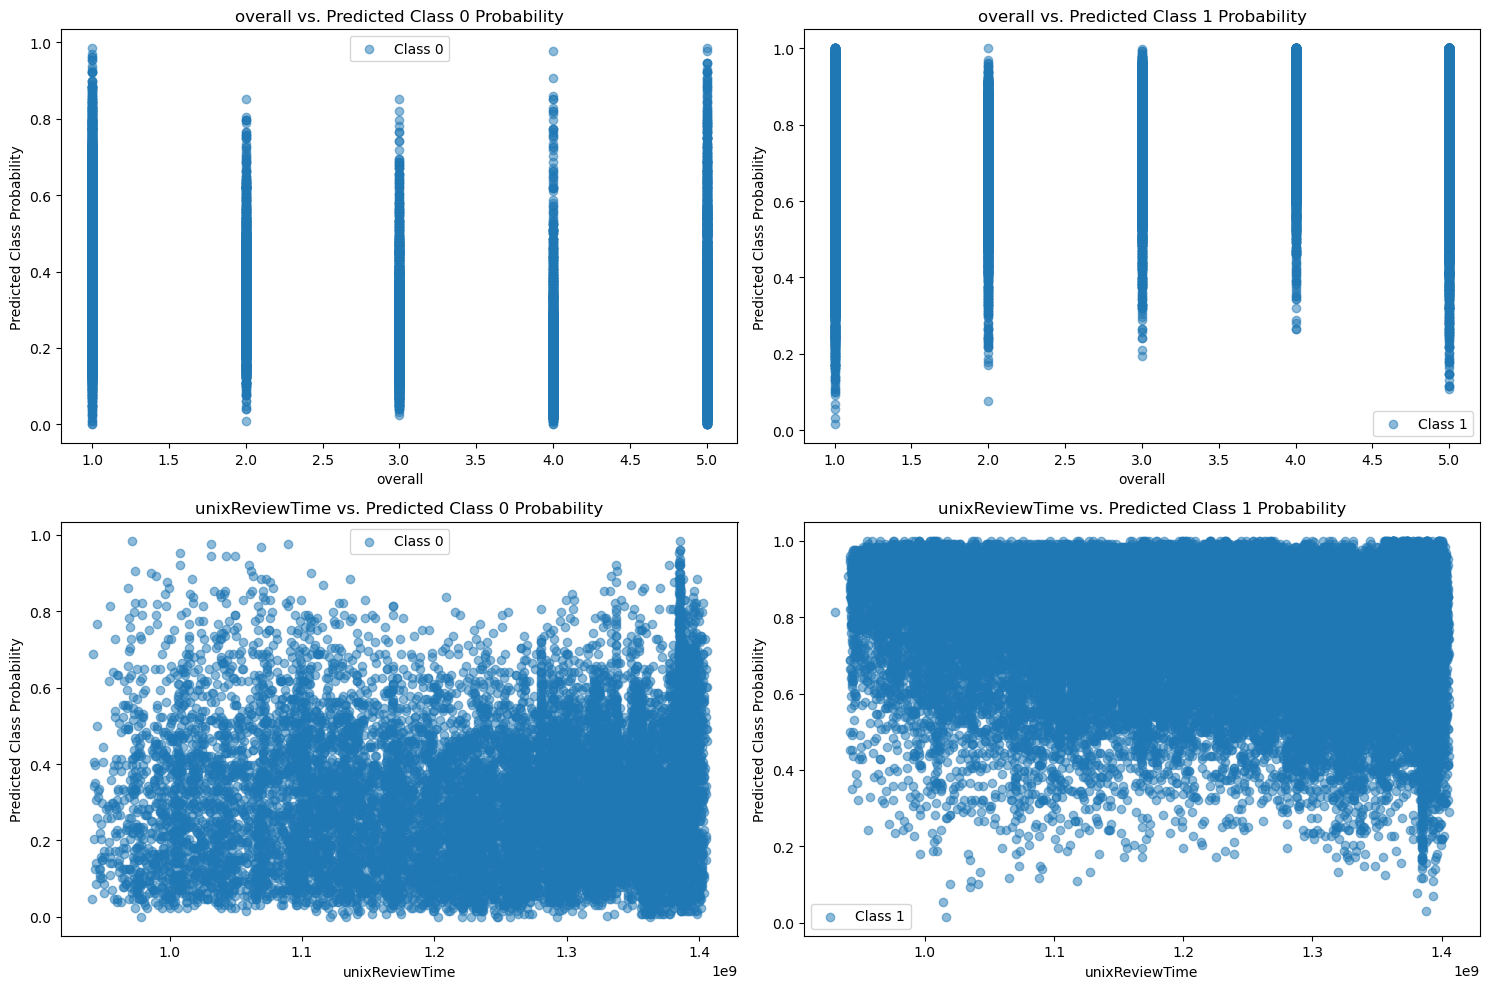

In [495]:
# Make predictions on the testing set
y_pred_prob = forest.predict_proba(X_test)

# Select the independent variables for plotting
selected_variables = ['overall','unixReviewTime'] 

# Create a multi-dimensional scatter plot for each pair of selected independent variables and class probabilities
fig, axes = plt.subplots(nrows=len(selected_variables), ncols=len(forest.classes_), figsize=(15, 10))

for i, variable in enumerate(selected_variables):
    for j, class_index in enumerate(forest.classes_):
        axes[i, j].scatter(X_test[variable][y_test == class_index], y_pred_prob[y_test == class_index, j], label=f'Class {class_index}', alpha=0.5)
        axes[i, j].set_xlabel(variable)
        axes[i, j].set_ylabel('Predicted Class Probability')
        axes[i, j].set_title(f'{variable} vs. Predicted Class {class_index} Probability')
        axes[i, j].legend()

plt.tight_layout()
plt.show()


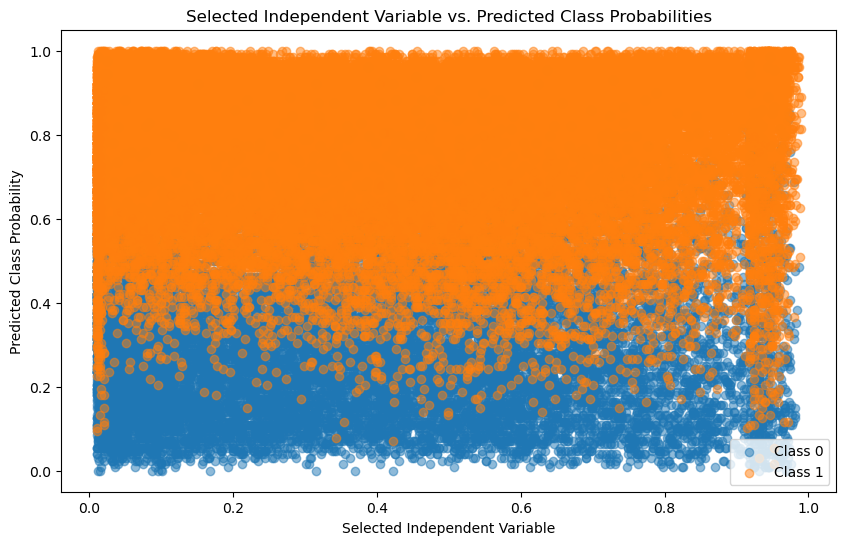

In [473]:
# Make predictions on the testing set
y_pred_prob = forest.predict_proba(X_test)

# Select the independent variable for plotting (e.g., review rating)
selected_variable = X_test[['0']]

# Plot the selected independent variable against the class probabilities
plt.figure(figsize=(10, 6))
for class_index in range(len(forest.classes_)):
    plt.scatter(selected_variable[y_test == class_index], y_pred_prob[y_test == class_index, class_index], label=f'Class {class_index}', alpha=0.5)

plt.xlabel('Selected Independent Variable')
plt.ylabel('Predicted Class Probability')
plt.title('Selected Independent Variable vs. Predicted Class Probabilities')
plt.legend()
plt.show()

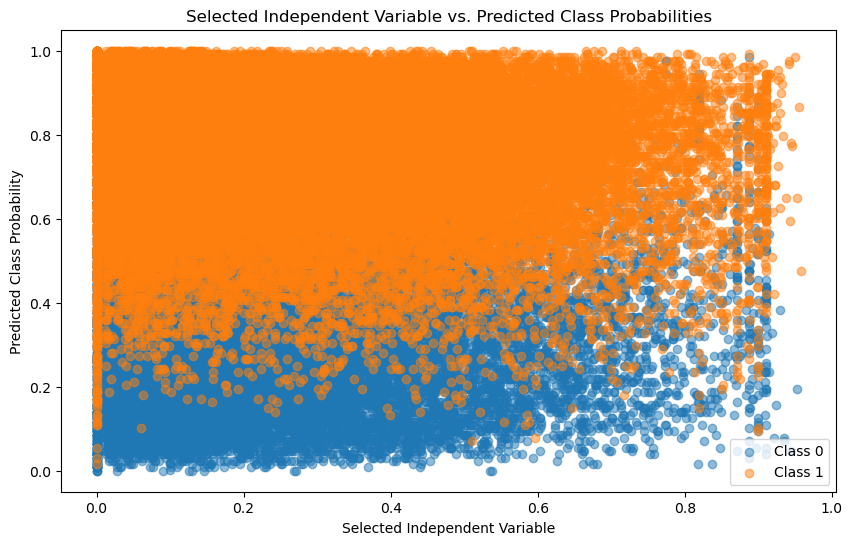

In [483]:
# Make predictions on the testing set
y_pred_prob = forest.predict_proba(X_test)

# Select the independent variable for plotting (e.g., review rating)
selected_variable = X_test[['1']]

# Plot the selected independent variable against the class probabilities
plt.figure(figsize=(10, 6))
for class_index in range(len(forest.classes_)):
    plt.scatter(selected_variable[y_test == class_index], y_pred_prob[y_test == class_index, class_index], label=f'Class {class_index}', alpha=0.5)

plt.xlabel('Selected Independent Variable')
plt.ylabel('Predicted Class Probability')
plt.title('Selected Independent Variable vs. Predicted Class Probabilities')
plt.legend()
plt.show()

We analyze selected variables and find out whether a variable has a positive or negative influence on the probability of belonging to a certain class (i.e. helpful or hunhelpful).

Final step of the result interpretation is then to compare and contrast the discoveries with theory and literature.

## SUMMARY AND COMPARISON


The studies both the original and the replication have highlighted the potential of Machine learning and NLP to discover patterns and relationships and use human verification to interpret those results in a human context.

Visualizations helped to discover those trends and highlight patterns that would be difficoult to understand by mere number analysis.

Big data analytics have the potential to provide a new and innovative approach to using large datasets to increase scientific knowledge and the comprehension of our world and its patterns.

From my study and the source original work I have had the chance to understand better the process to adopt and the relative weights assigned to each phase.

Initial objectives (asking the questions you want to answer) and exploring the way of achieving I found out it is extremely important in the first phase even before data collection. The initial questions and its framing have guided the rest of the process.

Understanding and preparing the data is also vital to set the ground for analysis.

I have followed the original research phases and its guidelines and even if computing resources did not allow me to reach the same depth of analysis the  results are quite similar and showing the value of the guidelines for IS researchers in applying BDA.

These are an excellent starting point for further iterative testing and researching.

## REFLECTION

1) 3 THINGS I HAVE LEARNED

1) Human feedback to detect the intruder in Amazon Mechanical Turk, I used Mechanical Turk for other purpouses and I was intrigued by the possibility to bring in the human equation in the study and enrich the research with those contributions.

2) The empirical triangulation of the LDA results using a word intrusion task to measure the semantic coherence of topics by inserting a random word into a set of words.

3) The shift of focus from a star rating system in the early researches to a text analysis approach in the reviews (e.g.,Mudambi & Schuff, 2010;Cao et al, 2011; Ghose & Ipeirotis, 2011; Pan & Zhang, 2011; Korfiatisa et al, 2012).


2) 2 QUESTIONS STILL OPEN

1) We are facing an explosion of data and it is still open the question if and how difficult will be for BDA to keep the pace and overcome the difficulties to measure and theorize.

2) Will guidelines remain applicable to future researches and how we will have to adapt and modify them if necessary.

3) 1 THING I HAVE ENJOYED

The challenge to overcome the roadblocks that I have faced due to my computer limited computing capabilities. More than that also the way to find a solution to problems I had never faced and that I did not know hoow to address but after a deep research was able to understand and overcome.